In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
#Load dataset
df = pd.read_csv('Churn_Modelling (1).csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Preprocessing the dataset
#step 1: Removing unwanted columns
df = df.drop(['CustomerId'], axis = 1)

In [8]:
#step 2: encode categorical variables
df = pd.get_dummies(df)

In [9]:
#step 3: Splitting dataset to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis = 1), df['Exited'], test_size = 0.2, random_state=42)

In [10]:
#Creating heterogeneous ensemble random forest classifier
#Step 1: Creating base classifier
rf1 = RandomForestClassifier(n_estimators = 50, random_state = 42)
dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)
lr = LogisticRegression(random_state = 42)

In [11]:
#Create heterogeneous ensemble classifier
hetero_rf = VotingClassifier(estimators=[('rf1', rf1), ('dt', dt), ('lr', lr)], voting = 'hard') 

In [12]:
#Train the classifier on training set
hetero_rf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf1',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('lr', LogisticRegression(random_state=42))])

In [13]:
#Pedicting on test set
y_pred = hetero_rf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Calculating accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.853


In [15]:
#Calculating precision
print('Precision:', precision_score(y_test, y_pred))

Precision: 0.851063829787234


In [16]:
#calculating recall
print('Recall:', recall_score(y_test, y_pred))

Recall: 0.3053435114503817


In [17]:
#calcuating F1 score
print('F1 score:', f1_score(y_test, y_pred))

F1 score: 0.44943820224719105


In [18]:
#confusion matrix plot
import seaborn as sns
import matplotlib.pyplot as plt 

cm =  confusion_matrix(y_test, y_pred)

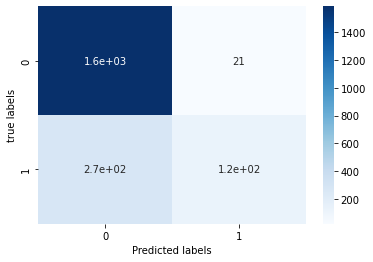

In [19]:
#Heatmap
sns.heatmap(cm, annot = True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('true labels')
plt.show()